In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [85]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/train_preprocessed.csv')

In [86]:
df = df.dropna()
df

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,1.0,0.073836,-0.223516,-0.292989,1.049501,0.880128,0.520741,0.616203,-0.945995,-0.471071,...,False,False,True,False,False,False,False,True,False,208500.0
1,2.0,-0.874133,0.525544,-0.082066,0.156499,-0.428117,-0.570040,1.242232,-0.642892,0.501913,...,False,False,True,False,False,False,False,True,False,181500.0
2,3.0,0.073836,-0.073704,0.220563,0.983353,0.831675,0.331524,0.109855,-0.303599,-0.317694,...,False,False,True,False,False,False,False,True,False,223500.0
3,4.0,0.310828,-0.473203,-0.091236,-1.861023,-0.718838,-0.570040,-0.511571,-0.063831,-0.710722,...,False,False,True,True,False,False,False,False,False,140000.0
4,5.0,0.073836,0.725293,0.772632,0.950278,0.734768,1.377783,0.498822,-0.176929,0.221521,...,False,False,True,False,False,False,False,True,False,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,1456.0,0.073836,-0.373328,-0.390747,0.917204,0.734768,-0.570040,-1.008712,0.870357,-0.238610,...,False,False,True,False,False,False,False,True,False,175000.0
1450,1457.0,-0.874133,0.775231,0.573630,0.222648,0.153325,0.092220,0.809535,0.047005,1.172936,...,False,False,True,False,False,False,False,True,False,210000.0
1451,1458.0,0.310828,-0.173579,-0.184409,-1.001095,1.025489,-0.570040,-0.375778,0.698449,0.238296,...,False,False,True,False,False,False,False,True,False,266500.0
1452,1459.0,-0.874133,-0.073704,-0.060607,-0.703428,0.540953,-0.570040,-0.895935,-1.285288,0.060954,...,False,False,True,False,False,False,False,True,False,142125.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1454 entries, 0 to 1453
Columns: 225 entries, Id to SalePrice
dtypes: bool(185), float64(40)
memory usage: 728.4 KB


Số lượng trường dữ liệu trong tập dữ liệu: 225


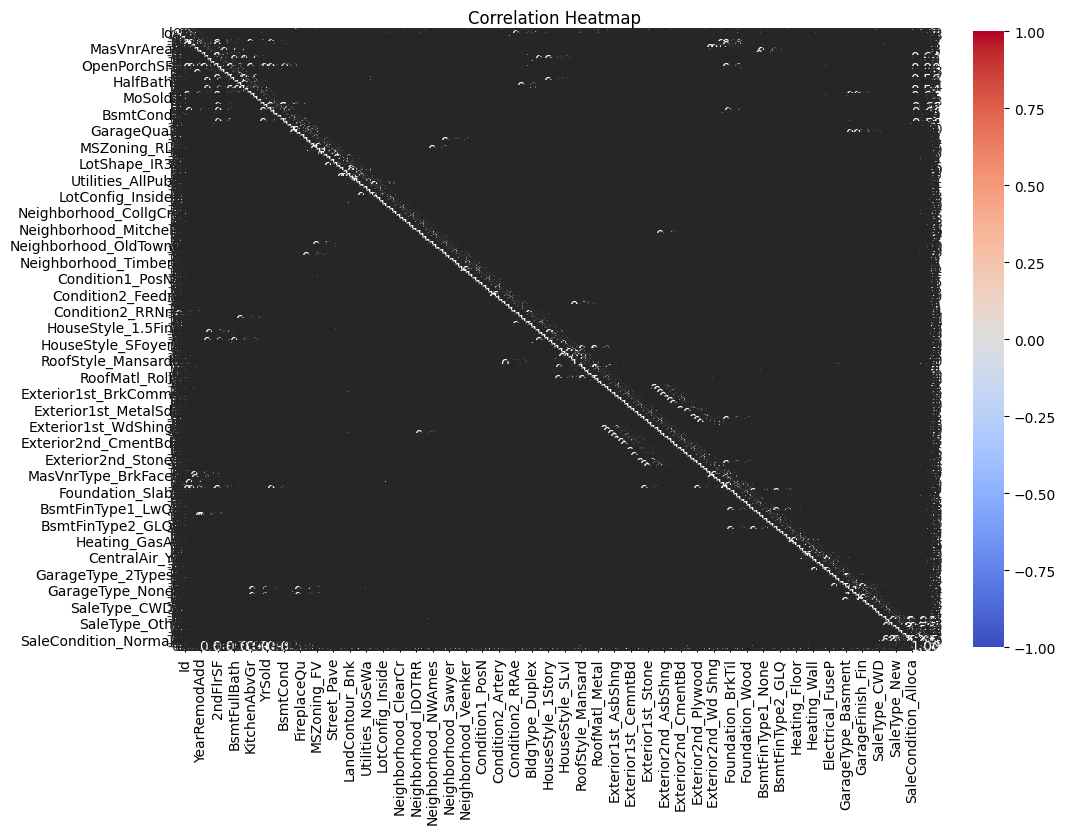

In [88]:

# Đếm số lượng trường dữ liệu (cột)
num_columns = df.shape[1]
print(f"Số lượng trường dữ liệu trong tập dữ liệu: {num_columns}")
# Tính toán ma trận tương quan
correlation_matrix = df.corr()
# Vẽ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('output1.png')

plt.show()

In [89]:
 import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Giả sử bạn đã có DataFrame df chứa dữ liệu
# Tách biến mục tiêu
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

# Huấn luyện mô hình Random Forest để lấy độ quan trọng
model = RandomForestRegressor(random_state=42)  # Thêm random_state để đảm bảo kết quả tái lập
model.fit(X, y)

# Lấy độ quan trọng của các đặc trưng
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sắp xếp theo độ quan trọng
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Hiển thị độ quan trọng
print(feature_importance_df)

# Nếu bạn muốn hiển thị đầy đủ DataFrame
pd.set_option('display.max_rows', None)  # Không giới hạn số lượng hàng
print(feature_importance_df)
pd.reset_option('display.max_rows')  # Đặt lại về mặc định nếu cần

              Feature    Importance
13        OverallQual  6.265994e-01
10           2ndFlrSF  6.293752e-02
9         TotalBsmtSF  5.499517e-02
7          BsmtFinSF1  2.894943e-02
23         GarageCars  2.601530e-02
..                ...           ...
125    RoofMatl_Metal  1.157526e-08
98    Condition2_PosA  1.037261e-08
93    Condition1_RRNe  9.432050e-09
55   Utilities_NoSeWa  8.681018e-09
122  RoofMatl_ClyTile  0.000000e+00

[224 rows x 2 columns]
                   Feature    Importance
13             OverallQual  6.265994e-01
10                2ndFlrSF  6.293752e-02
9              TotalBsmtSF  5.499517e-02
7               BsmtFinSF1  2.894943e-02
23              GarageCars  2.601530e-02
3                  LotArea  2.563818e-02
21            TotRmsAbvGrd  1.780144e-02
17                FullBath  1.496185e-02
22              Fireplaces  9.402185e-03
2              LotFrontage  7.946102e-03
4                YearBuilt  7.720132e-03
12             OpenPorchSF  7.593709e-03
6          

In [90]:
# Loại bỏ các đặc trưng không quan trọng (độ quan trọng = 0)
low_importance_features = feature_importance_df[feature_importance_df['Importance'] == 0]['Feature']
low_importance_features
X = X.drop(columns = 'Id')
X = X.drop(columns=low_importance_features)

In [91]:
X

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073836,-0.223516,-0.292989,1.049501,0.880128,0.520741,0.616203,-0.945995,-0.471071,1.160888,...,False,False,False,True,False,False,False,False,True,False
1,-0.874133,0.525544,-0.082066,0.156499,-0.428117,-0.570040,1.242232,-0.642892,0.501913,-0.795207,...,False,False,False,True,False,False,False,False,True,False
2,0.073836,-0.073704,0.220563,0.983353,0.831675,0.331524,0.109855,-0.303599,-0.317694,1.188374,...,False,False,False,True,False,False,False,False,True,False
3,0.310828,-0.473203,-0.091236,-1.861023,-0.718838,-0.570040,-0.511571,-0.063831,-0.710722,0.936418,...,False,False,False,True,True,False,False,False,False,False
4,0.073836,0.725293,0.772632,0.950278,0.734768,1.377783,0.498822,-0.176929,0.221521,1.616699,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,0.073836,-0.373328,-0.390747,0.917204,0.734768,-0.570040,-1.008712,0.870357,-0.238610,0.794406,...,False,False,False,True,False,False,False,False,True,False
1450,-0.874133,0.775231,0.573630,0.222648,0.153325,0.092220,0.809535,0.047005,1.172936,-0.795207,...,False,False,False,True,False,False,False,False,True,False
1451,0.310828,-0.173579,-0.184409,-1.001095,1.025489,-0.570040,-0.375778,0.698449,0.238296,1.843459,...,False,False,False,True,False,False,False,False,True,False
1452,-0.874133,-0.073704,-0.060607,-0.703428,0.540953,-0.570040,-0.895935,-1.285288,0.060954,-0.795207,...,False,False,False,True,False,False,False,False,True,False


In [92]:


# Tạo biến tổng hợp
if 'FullBath' in X.columns and 'HalfBath' in X.columns:
    X['TotalBath'] = X['FullBath'] + X['HalfBath']
if 'TotRmsAbvGrd' in X.columns and 'BedroomAbvGr' in X.columns:
    X['TotalRooms'] = X['TotRmsAbvGrd'] + X['BedroomAbvGr']
if 'TotalBsmtSF' in X.columns and '1stFlrSF' in X.columns and '2ndFlrSF' in X.columns and 'WoodDeckSF' in X.columns and 'OpenPorchSF' in X.columns:
    X['TotalArea'] = (X['TotalBsmtSF'] + X['1stFlrSF'] +
                      X['2ndFlrSF'] + X['WoodDeckSF'] +
                      X['OpenPorchSF'])
if 'GrLivArea' in X.columns and 'GarageArea' in X.columns:
    X['LivingArea'] = X['GrLivArea'] + X['GarageArea']
if 'YearBuilt' in X.columns:
    X['Age'] = 2025 - X['YearBuilt']  # Giả sử năm hiện tại là 2023
if 'YearRemodAdd' in X.columns:
    X['RemodAge'] = 2025 - X['YearRemodAdd']
if 'OverallQual' in X.columns and 'OverallCond' in X.columns:
    X['OverallCondition'] = (X['OverallQual'] + X['OverallCond']) / 2  # Tính trung bình

# Thêm các biến tổng hợp mới
if 'BsmtFullBath' in X.columns and 'BsmtHalfBath' in X.columns:
    X['TotalBathrooms'] = X['TotalBath'] + X['BsmtFullBath'] + X['BsmtHalfBath']
if 'GrLivArea' in X.columns and 'TotalBsmtSF' in X.columns:
    X['TotalFinishedArea'] = X['GrLivArea'] + X['TotalBsmtSF']
if 'TotalRooms' in X.columns and 'TotalArea' in X.columns:
    X['RoomsPerArea'] = X['TotalRooms'] / X['TotalArea']
if 'YearRemodAdd' in X.columns:
    X['Remodeled'] = (X['YearRemodAdd'] > X['YearBuilt']).astype(int)
if 'OverallQual' in X.columns and 'OverallCond' in X.columns:
    X['QualityCondition'] = (X['OverallQual'] + X['OverallCond'] + X['TotalBath']) / 3
# Kiểm tra lại các đặc trưng sau khi thực hiện feature engineering
print("Các đặc trưng sau khi thực hiện feature engineering:")
X



Các đặc trưng sau khi thực hiện feature engineering:


,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleCondition_Normal,SaleCondition_Partial,TotalBath,TotalRooms,Age,RemodAge,OverallCondition,TotalBathrooms,Remodeled,QualityCondition
0,0.073836,-0.223516,-0.292989,1.049501,0.880128,0.520741,0.616203,-0.945995,-0.471071,1.160888,...,True,False,2.017530,1.084265,2023.950499,2024.119872,0.069557,2.902223,0,0.718881
1,-0.874133,0.525544,-0.082066,0.156499,-0.428117,-0.570040,1.242232,-0.642892,0.501913,-0.795207,...,True,False,0.029410,-0.150720,2024.843501,2025.428117,1.055009,3.173834,0,0.713143
2,0.073836,-0.073704,0.220563,0.983353,0.831675,0.331524,0.109855,-0.303599,-0.317694,1.188374,...,True,False,2.017530,-0.150720,2024.016647,2024.168325,0.069557,2.902223,0,0.718881
3,0.310828,-0.473203,-0.091236,-1.861023,-0.718838,-0.570040,-0.511571,-0.063831,-0.710722,0.936418,...,False,False,-1.784973,0.466772,2026.861023,2025.718838,0.069557,-0.900280,1,-0.548620
4,0.073836,0.725293,0.772632,0.950278,0.734768,1.377783,0.498822,-0.176929,0.221521,1.616699,...,True,False,2.017530,2.927612,2024.049722,2024.265232,0.431698,2.902223,0,0.960309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,0.073836,-0.373328,-0.390747,0.917204,0.734768,-0.570040,-1.008712,0.870357,-0.238610,0.794406,...,True,False,2.017530,0.466772,2024.082796,2024.265232,-0.292585,0.957763,0,0.477454
1450,-0.874133,0.775231,0.573630,0.222648,0.153325,0.092220,0.809535,0.047005,1.172936,-0.795207,...,True,False,0.029410,0.466772,2024.777352,2024.846675,0.156613,0.914102,0,0.114212
1451,0.310828,-0.173579,-0.184409,-1.001095,1.025489,-0.570040,-0.375778,0.698449,0.238296,1.843459,...,True,False,0.029410,2.927612,2026.001095,2023.974511,1.866349,-1.030358,1,1.254036
1452,-0.874133,-0.073704,-0.060607,-0.703428,0.540953,-0.570040,-0.895935,-1.285288,0.060954,-0.795207,...,True,False,-1.784973,-1.994067,2025.703428,2024.459047,-0.205528,-0.900280,1,-0.732010


In [93]:
# Huấn luyện lại mô hình với các đặc trưng đã được xử lý
model.fit(X, y)
# Lấy độ quan trọng của các đặc trưng từ mô hình mới
importances_new = model.feature_importances_

# Tạo DataFrame về độ quan trọng của các đặc trưng mới
feature_importance_new_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_new})

# Sắp xếp theo độ quan trọng giảm dần
feature_importance_new_df = feature_importance_new_df.sort_values(by='Importance', ascending=False)

# Hiển thị độ quan trọng của các đặc trưng mới
print("Độ quan trọng của các đặc trưng sau Feature Engineering:")
feature_importance_new_df.head(15) # Or feature_importance_new_df.head(15) to show top 15
# Kiểm tra độ chính xác của mô hình (nếu cần)
# score = model.score(X, y)  # Đo lường độ chính xác trên toàn bộ dữ liệu
# print(f"Độ chính xác của mô hình: {score:.2f}")

X.to_csv('processed_data.csv', index=False)


Độ quan trọng của các đặc trưng sau Feature Engineering:


In [94]:
feature_importance_new_df.head(15)

,Feature,Importance
12,OverallQual,0.529241
229,QualityCondition,0.129199
8,TotalBsmtSF,0.074119
9,2ndFlrSF,0.055034
6,BsmtFinSF1,0.027988
2,LotArea,0.022126
22,GarageCars,0.012014
20,TotRmsAbvGrd,0.010692
227,TotalBathrooms,0.010613
223,TotalRooms,0.007757
